In [81]:
import pandas as pd

# analyse participant 37
df = pd.read_csv("/home/aayush/accelerometer/accprocess/results/P037-timeSeries.csv.gz")
print(df)

                                                 time    acc  light  \
0     2016-10-30 00:28:00.000000+0100 [Europe/London]  1.805    0.0   
1     2016-10-30 00:28:30.000000+0100 [Europe/London]  1.759    0.0   
2     2016-10-30 00:29:00.000000+0100 [Europe/London]  1.702    0.0   
3     2016-10-30 00:29:30.000000+0100 [Europe/London]  1.815    0.0   
4     2016-10-30 00:30:00.000000+0100 [Europe/London]  1.672    0.0   
...                                               ...    ...    ...   
3295  2016-10-31 02:55:30.000000+0000 [Europe/London]  1.455    0.0   
3296  2016-10-31 02:56:00.000000+0000 [Europe/London]  1.430    0.0   
3297  2016-10-31 02:56:30.000000+0000 [Europe/London]  1.390    0.0   
3298  2016-10-31 02:57:00.000000+0000 [Europe/London]  1.492    0.0   
3299  2016-10-31 02:57:30.000000+0000 [Europe/London]  1.347    0.0   

      moderate-vigorous  sedentary  sleep  CpSB  CpLPA  CpMPA  CpVPA  CpMVPA  \
0                   0.0        0.0    1.0   0.0    0.0    0.0    0.

In [80]:
# activities = df[df.columns.values.tolist()[2:6]]
# out = activities[activities==1].idxmax(axis=1)
# df["activity_predicted"] = out
# df[df["activity_predicted"].isna()]["time"]

/tmp/ipykernel_313419/1102862102.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  out = activities[activities==1].idxmax(axis=1)


2746    2016-10-30 22:21:00.000000+0000 [Europe/London]
2747    2016-10-30 22:21:30.000000+0000 [Europe/London]
2748    2016-10-30 22:22:00.000000+0000 [Europe/London]
2749    2016-10-30 22:22:30.000000+0000 [Europe/London]
2750    2016-10-30 22:23:00.000000+0000 [Europe/London]
                             ...                       
2867    2016-10-30 23:21:30.000000+0000 [Europe/London]
2868    2016-10-30 23:22:00.000000+0000 [Europe/London]
2869    2016-10-30 23:22:30.000000+0000 [Europe/London]
2870    2016-10-30 23:23:00.000000+0000 [Europe/London]
2871    2016-10-30 23:23:30.000000+0000 [Europe/London]
Name: time, Length: 126, dtype: object

In [122]:
activities = df[df.columns.values.tolist()[2:6]]
out = activities[activities==1].idxmax(axis=1)
df["activity_predicted"] = out
df_cleaned = df.dropna(subset=["activity_predicted"])
print(len(df))
print(df_cleaned["activity_predicted"])
print(df_cleaned.iloc[284])

3300
0       sleep
1       sleep
2       sleep
3       sleep
4       sleep
        ...  
3295    sleep
3296    sleep
3297    sleep
3298    sleep
3299    sleep
Name: activity_predicted, Length: 3174, dtype: object
time                  2016-10-30 01:50:00.000000+0000 [Europe/London]
acc                                                             0.333
light                                                             0.0
moderate-vigorous                                                 0.0
sedentary                                                         0.0
sleep                                                             1.0
CpSB                                                              0.0
CpLPA                                                             0.0
CpMPA                                                             0.0
CpVPA                                                             0.0
CpMVPA                                                            0.0
MET              

/tmp/ipykernel_313419/1640840247.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  out = activities[activities==1].idxmax(axis=1)


In [124]:
# from IPython.display import display
# with pd.option_context('display.max_rows', 1200, 'display.max_columns', 10):
#     #some pandas stuff
#     print(df_cleaned[["time", "activity_predicted"]].head(1000))

                                                time activity_predicted
0    2016-10-30 00:28:00.000000+0100 [Europe/London]              sleep
1    2016-10-30 00:28:30.000000+0100 [Europe/London]              sleep
2    2016-10-30 00:29:00.000000+0100 [Europe/London]              sleep
3    2016-10-30 00:29:30.000000+0100 [Europe/London]              sleep
4    2016-10-30 00:30:00.000000+0100 [Europe/London]              sleep
5    2016-10-30 00:30:30.000000+0100 [Europe/London]              sleep
6    2016-10-30 00:31:00.000000+0100 [Europe/London]              sleep
7    2016-10-30 00:31:30.000000+0100 [Europe/London]              sleep
8    2016-10-30 00:32:00.000000+0100 [Europe/London]              sleep
9    2016-10-30 00:32:30.000000+0100 [Europe/London]              sleep
10   2016-10-30 00:33:00.000000+0100 [Europe/London]              sleep
11   2016-10-30 00:33:30.000000+0100 [Europe/London]              sleep
12   2016-10-30 00:34:00.000000+0100 [Europe/London]            

In [64]:
import csv
labels_dict = {}
with open("/home/aayush/accelerometer/accprocess/anno-label.csv", "r") as annotation_dict:
    reader = csv.DictReader(annotation_dict)
    for row in reader:
        if labels_dict.get(row['annotation']) is None:
            labels_dict[row['annotation']] = [row['label:Walmsley2020']]
        else:
            labels_dict[row['annotation']].append(row['label:Walmsley2020'])

In [106]:
annotated_data = pd.read_csv("/home/yacine/accel/capture24/participants/P037.csv")
actual_labels_orig = annotated_data[["annotation", "time"]][0::3000]

/tmp/ipykernel_313419/4150412666.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  annotated_data = pd.read_csv("/home/yacine/accel/capture24/participants/P037.csv")


In [107]:
actual_labels = actual_labels_orig

In [108]:
# # convert MET to float and plot a graph of MET values with timestamp as x-axis.
# def parse_MET(met_string):
#     if met_string is not None:
#         met = str(met_string).split(';')[-1]
#         met_value = float(met.split(" ")[-1])
#     else:
#         met_value = None
#     return met_value

# def parse_datetime(dt_string):
#     clean_datetime_str = dt_string.split('[')[0].strip()
#     dt_object = pd.to_datetime(clean_datetime_str)
#     return dt_object

# actual_time = actual_labels["time"].apply(parse_datetime)
# actual_labels["time"] = actual_time
# met_value = actual_labels['annotation'].apply(parse_MET)

In [109]:
# actual_labels['met'] = met_value
# print(actual_labels[actual_labels['met'].isna()])
# actual_labels.set_index('time', inplace=True)

        annotation                time  met
2343000        NaN 2016-10-30 05:58:30  NaN
2346000        NaN 2016-10-30 05:59:00  NaN
2349000        NaN 2016-10-30 05:59:30  NaN
2352000        NaN 2016-10-30 06:00:00  NaN
2355000        NaN 2016-10-30 06:00:30  NaN
...            ...                 ...  ...
8745000        NaN 2016-10-30 23:45:30  NaN
8748000        NaN 2016-10-30 23:46:00  NaN
8751000        NaN 2016-10-30 23:46:30  NaN
8754000        NaN 2016-10-30 23:47:00  NaN
8757000        NaN 2016-10-30 23:47:30  NaN

[1216 rows x 3 columns]


<Axes: title={'center': 'met value'}, xlabel='time'>

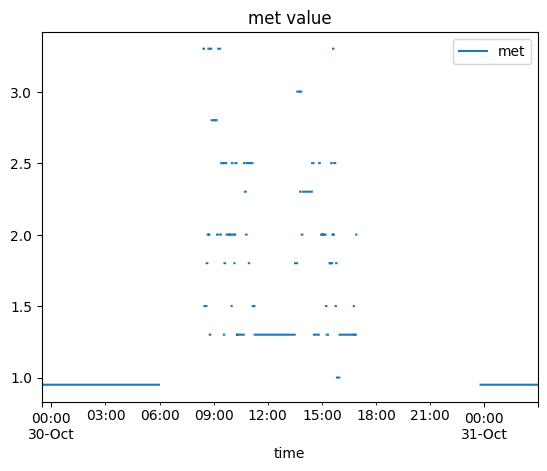

In [110]:
# actual_labels[['met']].plot(title='met value')

In [68]:
print(actual_labels)
actual_labels.dropna(subset=["annotation"], inplace=True)
print(actual_labels)

                     annotation                        time
0        7030 sleeping;MET 0.95  2016-10-29 23:28:00.000000
3000     7030 sleeping;MET 0.95  2016-10-29 23:28:30.000000
6000     7030 sleeping;MET 0.95  2016-10-29 23:29:00.000000
9000     7030 sleeping;MET 0.95  2016-10-29 23:29:30.000000
12000    7030 sleeping;MET 0.95  2016-10-29 23:30:00.000000
...                         ...                         ...
9888000  7030 sleeping;MET 0.95  2016-10-31 02:56:00.000000
9891000  7030 sleeping;MET 0.95  2016-10-31 02:56:30.000000
9894000  7030 sleeping;MET 0.95  2016-10-31 02:57:00.000000
9897000  7030 sleeping;MET 0.95  2016-10-31 02:57:30.000000
9900000  7030 sleeping;MET 0.95  2016-10-31 02:58:00.000000

[3301 rows x 2 columns]
                     annotation                        time
0        7030 sleeping;MET 0.95  2016-10-29 23:28:00.000000
3000     7030 sleeping;MET 0.95  2016-10-29 23:28:30.000000
6000     7030 sleeping;MET 0.95  2016-10-29 23:29:00.000000
9000     7030 s

In [69]:
def parse_datetime(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

def parse_datetime_df_time(dt_string):
    clean_datetime_str = dt_string.split('[')[0].strip()
    clean_datetime_str = clean_datetime_str.split('+')[0].strip()
    dt_object = pd.to_datetime(clean_datetime_str)
    return dt_object

In [70]:
df_cleaned_time = df_cleaned['time'].apply(parse_datetime_df_time)
actual_time = actual_labels["time"].apply(parse_datetime)
actual_labels["time"] = actual_time

In [71]:
print(df_cleaned_time)
print(actual_time)

0      2016-10-30 00:28:00
1      2016-10-30 00:28:30
2      2016-10-30 00:29:00
3      2016-10-30 00:29:30
4      2016-10-30 00:30:00
               ...        
3295   2016-10-31 02:55:30
3296   2016-10-31 02:56:00
3297   2016-10-31 02:56:30
3298   2016-10-31 02:57:00
3299   2016-10-31 02:57:30
Name: time, Length: 3174, dtype: datetime64[ns]
0         2016-10-29 23:28:00
3000      2016-10-29 23:28:30
6000      2016-10-29 23:29:00
9000      2016-10-29 23:29:30
12000     2016-10-29 23:30:00
                  ...        
9888000   2016-10-31 02:56:00
9891000   2016-10-31 02:56:30
9894000   2016-10-31 02:57:00
9897000   2016-10-31 02:57:30
9900000   2016-10-31 02:58:00
Name: time, Length: 2085, dtype: datetime64[ns]


In [73]:
actual_labels_filtered = actual_labels[~actual_labels["time"].isin(df_cleaned_time)]
print(actual_labels_filtered)


print(df_cleaned_time) --> for one hour between 11:30 to 12:30 at night (29th Oct to 30th Oct)

                     annotation                time
0        7030 sleeping;MET 0.95 2016-10-29 23:28:00
3000     7030 sleeping;MET 0.95 2016-10-29 23:28:30
6000     7030 sleeping;MET 0.95 2016-10-29 23:29:00
9000     7030 sleeping;MET 0.95 2016-10-29 23:29:30
12000    7030 sleeping;MET 0.95 2016-10-29 23:30:00
...                         ...                 ...
348000   7030 sleeping;MET 0.95 2016-10-30 00:26:00
351000   7030 sleeping;MET 0.95 2016-10-30 00:26:30
354000   7030 sleeping;MET 0.95 2016-10-30 00:27:00
357000   7030 sleeping;MET 0.95 2016-10-30 00:27:30
9900000  7030 sleeping;MET 0.95 2016-10-31 02:58:00

[121 rows x 2 columns]


In [42]:
df_cleaned['time_cleaned'] = df_cleaned_time
print(df_cleaned['time_cleaned'])
df_cleaned_filtered = df_cleaned[df_cleaned['time_cleaned'].isin(actual_labels_filtered["time"])]
print(df_cleaned_filtered['time_cleaned'])

print(df_cleaned_filtered[df_cleaned_filtered['time_cleaned'].duplicated(keep=False)][['time_cleaned', 'activity_predicted']])
df_cleaned_filtered_dedup = df_cleaned_filtered[~df_cleaned_filtered['time_cleaned'].duplicated(keep='first')]
print(df_cleaned_filtered_dedup[['time_cleaned', 'activity_predicted']])

# from IPython.display import display
# with pd.option_context('display.max_rows', 300, 'display.max_columns', 10):
#     #some pandas stuff
#     print(df_cleaned_filtered[df_cleaned_filtered['time_cleaned'].duplicated(keep=False)][['time_cleaned', 'activity_predicted']].tail(200))

0      2016-10-30 00:28:00
1      2016-10-30 00:28:30
2      2016-10-30 00:29:00
3      2016-10-30 00:29:30
4      2016-10-30 00:30:00
               ...        
3295   2016-10-31 02:55:30
3296   2016-10-31 02:56:00
3297   2016-10-31 02:56:30
3298   2016-10-31 02:57:00
3299   2016-10-31 02:57:30
Name: time_cleaned, Length: 3174, dtype: datetime64[ns]
0      2016-10-30 00:28:00
1      2016-10-30 00:28:30
2      2016-10-30 00:29:00
3      2016-10-30 00:29:30
4      2016-10-30 00:30:00
               ...        
3295   2016-10-31 02:55:30
3296   2016-10-31 02:56:00
3297   2016-10-31 02:56:30
3298   2016-10-31 02:57:00
3299   2016-10-31 02:57:30
Name: time_cleaned, Length: 2084, dtype: datetime64[ns]
           time_cleaned activity_predicted
64  2016-10-30 01:00:00              sleep
65  2016-10-30 01:00:30              sleep
66  2016-10-30 01:01:00              sleep
67  2016-10-30 01:01:30              sleep
68  2016-10-30 01:02:00              sleep
..                  ...             

/tmp/ipykernel_313419/2063590338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_cleaned'] = df_cleaned_time


In [43]:
flat_dict = {k: v[0] for k, v in labels_dict.items()}
actual_labels_filtered['annotation'].replace(flat_dict, inplace=True)
actual_labels_cleaned = actual_labels_filtered.dropna(subset=['annotation'])
print(actual_labels_cleaned)


        annotation                time
360000       sleep 2016-10-30 00:28:00
363000       sleep 2016-10-30 00:28:30
366000       sleep 2016-10-30 00:29:00
369000       sleep 2016-10-30 00:29:30
372000       sleep 2016-10-30 00:30:00
...            ...                 ...
9885000      sleep 2016-10-31 02:55:30
9888000      sleep 2016-10-31 02:56:00
9891000      sleep 2016-10-31 02:56:30
9894000      sleep 2016-10-31 02:57:00
9897000      sleep 2016-10-31 02:57:30

[1964 rows x 2 columns]


/tmp/ipykernel_313419/1753659332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  actual_labels_filtered['annotation'].replace(flat_dict, inplace=True)
/tmp/ipykernel_313419/1753659332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_labels_filtered['annotation'].replace(flat_dict, inplace=True)


In [44]:
print(actual_labels_cleaned[['time', 'annotation']])
print(df_cleaned_filtered_dedup[['time_cleaned', 'activity_predicted']])

                       time annotation
360000  2016-10-30 00:28:00      sleep
363000  2016-10-30 00:28:30      sleep
366000  2016-10-30 00:29:00      sleep
369000  2016-10-30 00:29:30      sleep
372000  2016-10-30 00:30:00      sleep
...                     ...        ...
9885000 2016-10-31 02:55:30      sleep
9888000 2016-10-31 02:56:00      sleep
9891000 2016-10-31 02:56:30      sleep
9894000 2016-10-31 02:57:00      sleep
9897000 2016-10-31 02:57:30      sleep

[1964 rows x 2 columns]
            time_cleaned activity_predicted
0    2016-10-30 00:28:00              sleep
1    2016-10-30 00:28:30              sleep
2    2016-10-30 00:29:00              sleep
3    2016-10-30 00:29:30              sleep
4    2016-10-30 00:30:00              sleep
...                  ...                ...
3295 2016-10-31 02:55:30              sleep
3296 2016-10-31 02:56:00              sleep
3297 2016-10-31 02:56:30              sleep
3298 2016-10-31 02:57:00              sleep
3299 2016-10-31 02:57:3

['sleep' 'light' 'sedentary' 'moderate-vigorous']
['sleep' 'sedentary' 'light' 'moderate-vigorous']


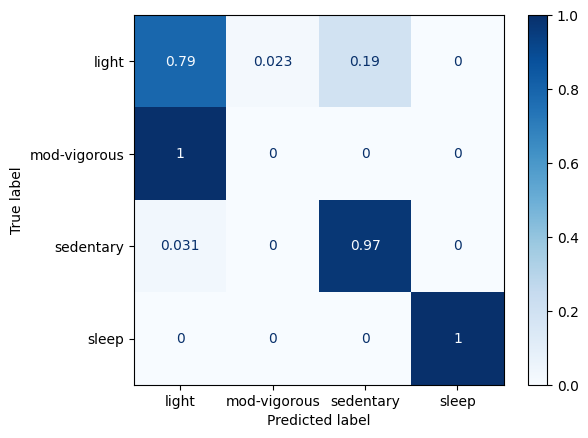

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
assert len(actual_labels_cleaned) == len(df_cleaned_filtered_dedup), "DataFrames must be of the same length"

true_labels = actual_labels_cleaned['annotation']
predicted_labels = df_cleaned_filtered_dedup['activity_predicted']

print(true_labels.unique())
print(predicted_labels.unique())

# Generate confusion matrix

cm = confusion_matrix(true_labels, predicted_labels, labels=['light', 'moderate-vigorous', 'sedentary', 'sleep'])

# Normalize by true values
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

import matplotlib.pyplot as plt

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['light', 'mod-vigorous', 'sedentary', 'sleep'])
disp.plot(cmap='Blues')  # You can change the color map as needed
plt.savefig("test.png")
